In [1]:
#load packages
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
#load datasets
df = pd.read_csv("news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
#dropping fist column not much useful information from the column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
#checking null values in dataframe
df.isna().any()

title    False
text     False
label    False
dtype: bool

---

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [8]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

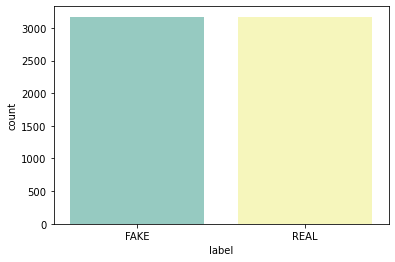

In [9]:
sns.countplot(x='label', data=df, palette='Set3')
plt.show()

In [10]:
def clean_text(text):
    
    #remove html tags 
    text=re.sub(r'<.*?>','',text)
    
    # remove the characters [\], ['],[] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)   
    text = re.sub(r"\—", "", text)  
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    return text

In [11]:
label_dict= {'REAL':1,"FAKE":0}
df["label"]=df["label"].map(label_dict)

df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [12]:
df["title"] = df["title"].apply(lambda x: clean_text(x))
df["text"] = df["text"].apply(lambda x: clean_text(x))

In [13]:
df.head()

,title,text,label
0,you can smell hillary’s fear,daniel greenfield a shillman journalism fello...,0
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,0
2,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said mon...,1
3,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november 9 2016 the...,0
4,the battle of new york why this primary matters,its primary day in new york and front runners ...,1


### Splitting the dataset

In [14]:
x_train, x_test,y_train, y_test=train_test_split(df["text"], df.label, random_state=42, test_size=0.25)

### TF-IDF Vectorizer

In [15]:
tfidf_vectorizer=CountVectorizer(stop_words="english",
                                max_df=0.8,
                                ngram_range=(1,3),
                                preprocessor=clean_text)

tfidf_vectorizer_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_vectorizer_test=tfidf_vectorizer.transform(x_test)



### Logistic Regression

In [16]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(tfidf_vectorizer_train, y_train)


LogisticRegression()

In [17]:
pred_lr=LR.predict(tfidf_vectorizer_test)
score = accuracy_score(y_test,pred_lr)
print(f'Random Forest Accuracy: {round(score*100,2)}%')

Random Forest Accuracy: 92.3%


In [18]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       794
           1       0.94      0.90      0.92       790

    accuracy                           0.92      1584
   macro avg       0.92      0.92      0.92      1584
weighted avg       0.92      0.92      0.92      1584



---

### Decision Tree Classification

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(tfidf_vectorizer_train, y_train)

pred_dt=dt.predict(tfidf_vectorizer_test)
score = accuracy_score(y_test,pred_dt)
print(f'Random Forest Accuracy: {round(score*100,2)}%')

Random Forest Accuracy: 82.7%


In [20]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       794
           1       0.83      0.82      0.83       790

    accuracy                           0.83      1584
   macro avg       0.83      0.83      0.83      1584
weighted avg       0.83      0.83      0.83      1584



### Gradient Boosting Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(tfidf_vectorizer_train, y_train)
pred_gbc=GBC.predict(tfidf_vectorizer_test)
score = accuracy_score(y_test,pred_gbc)
print(f'Random Forest Accuracy: {round(score*100,2)}%')

Random Forest Accuracy: 89.39%


In [22]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       794
           1       0.91      0.88      0.89       790

    accuracy                           0.89      1584
   macro avg       0.89      0.89      0.89      1584
weighted avg       0.89      0.89      0.89      1584



### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=32)
RFC.fit(tfidf_vectorizer_train, y_train)

pred_rfc=RFC.predict(tfidf_vectorizer_test)
score = accuracy_score(y_test,pred_gbc)
print(f'Random Forest Accuracy: {round(score*100,2)}%')

print(classification_report(y_test, pred_rfc))

Random Forest Accuracy: 89.39%
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       794
           1       0.88      0.89      0.89       790

    accuracy                           0.89      1584
   macro avg       0.89      0.89      0.89      1584
weighted avg       0.89      0.89      0.89      1584



### PassiveAggressiveClassifier

In [24]:

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_vectorizer_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_vectorizer_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
print(classification_report(y_test, y_pred))

Accuracy: 91.67%
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       794
           1       0.92      0.91      0.92       790

    accuracy                           0.92      1584
   macro avg       0.92      0.92      0.92      1584
weighted avg       0.92      0.92      0.92      1584



### Saving the model Pickle

In [25]:
# loading library
import pickle

In [26]:
# create an iterator object with write permission - model.pkl
with open('fakenewsdetection_model.pkl', 'wb') as files:
    pickle.dump(pac, files)

In [27]:
### dumping scalar pickle
with open("fakenewsdetection_scalar.pkl","wb") as files:
    pickle.dump(tfidf_vectorizer, files)

### Model Testing

In [28]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

In [29]:
def model_testing(text):
    news={"text":[text]}
    new_df=pd.DataFrame(news)
    print(new_df)
    new_df["text"]= new_df["text"].apply(lambda x: clean_text(x))
    new_x_test=new_df["text"]
    new_x_test=tfidf_vectorizer.transform(new_x_test)
    pred_LR=LR.predict(new_x_test)
    pred_PAC=pac.predict(new_x_test)
    return print("\n\nLR Prediction: {} \n\n PAC Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_PAC[0])))  

In [30]:
news = str(input())
model_testing(news)

test
   text
0  test


LR Prediction: Fake News 

 PAC Prediction: Fake News


In [32]:
df.text[2]

'u s  secretary of state john f  kerry said monday that he will stop in paris later this week  amid criticism that no top american officials attended sunday’s unity march against terrorism   kerry said he expects to arrive in paris thursday evening  as he heads home after a week abroad  he said he will fly to france at the conclusion of a series of meetings scheduled for thursday in sofia  bulgaria  he plans to meet the next day with foreign minister laurent fabius and president francois hollande  then return to washington   the visit by kerry  who has family and childhood ties to the country and speaks fluent french  could address some of the criticism that the united states snubbed france in its darkest hour in many years   the french press on monday was filled with questions about why neither president obama nor kerry attended sunday’s march  as about 40 leaders of other nations did  obama was said to have stayed away because his own security needs can be taxing on a country  and ke